#CIFAR-10 Photo Classification Dataset

CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.


The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below. <br/> <br/>

0: airplane <br/>
1: automobile <br/>
2: bird <br/>
3: cat <br/>
4: deer <br/>
5: dog <br/>
6: frog <br/>
7: horse <br/>
8: ship <br/>
9: truck



#Import Library

In [ ]:
# Import Libraries
import sys
from matplotlib import pyplot
%matplotlib inline
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

Using TensorFlow backend.


#Load Dataset

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	return trainX, trainY, testX, testY

In [ ]:
trainX, trainY, testX, testY = load_dataset()

170500096/170498071 [==============================] - 2s 0us/step


#Analyze Dataset

In [ ]:
def analyze_dataset(trainX, trainY, testX, testY, imageIndexList = range(0,3)):
  # summarize loaded dataset
  print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
  print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
  # plot first few images
  for i in imageIndexList:
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i])
    pyplot.title(str(trainY[i]))
    # show the figure
    pyplot.show()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


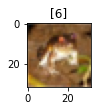

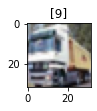

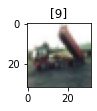

In [ ]:
analyze_dataset(trainX, trainY, testX, testY)

#Prepare Dataset

In [ ]:
def prepare_dataset(trainX, trainY, testX, testY):
  # Normalize the pixel value by rescaling them to the range [0,1]
  # and hot encode labels
  # convert from integers to floats
  trainX_norm = trainX.astype('float32')
  testX_norm = testX.astype('float32')
  trainX_norm = trainX_norm / 255.0
  testX_norm = testX_norm / 255.0
  # one hot encode target values
  trainY_hotencode = to_categorical(trainY)
  testY_hotencode = to_categorical(testY)
  return trainX_norm, trainY_hotencode, testX_norm, testY_hotencode

In [ ]:
trainX, trainY, testX, testY = prepare_dataset(trainX, trainY, testX, testY)

#Define Model

In [ ]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(6, (5, 5), activation='relu', kernel_initializer='glorot_uniform', padding='valid', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer='glorot_uniform', padding='valid'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(120, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(84, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
cfm = define_model()

In [ ]:
cfm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

#Train & Evaluate Model

In [ ]:
# fit model
history = cfm.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 2.1629 - accuracy: 0.1858 - val_loss: 1.9677 - val_accuracy: 0.2744
Epoch 2/10
 - 3s - loss: 1.8587 - accuracy: 0.3223 - val_loss: 1.7191 - val_accuracy: 0.3795
Epoch 3/10
 - 3s - loss: 1.6903 - accuracy: 0.3878 - val_loss: 1.6460 - val_accuracy: 0.3981
Epoch 4/10
 - 3s - loss: 1.5997 - accuracy: 0.4216 - val_loss: 1.5719 - val_accuracy: 0.4346
Epoch 5/10
 - 3s - loss: 1.5353 - accuracy: 0.4452 - val_loss: 1.5066 - val_accuracy: 0.4533
Epoch 6/10
 - 3s - loss: 1.4946 - accuracy: 0.4616 - val_loss: 1.4580 - val_accuracy: 0.4711
Epoch 7/10
 - 3s - loss: 1.4549 - accuracy: 0.4775 - val_loss: 1.4408 - val_accuracy: 0.4758
Epoch 8/10
 - 3s - loss: 1.4239 - accuracy: 0.4890 - val_loss: 1.4380 - val_accuracy: 0.4807
Epoch 9/10
 - 3s - loss: 1.3947 - accuracy: 0.5007 - val_loss: 1.4291 - val_accuracy: 0.4858
Epoch 10/10
 - 3s - loss: 1.3683 - accuracy: 0.5106 - val_loss: 1.3726 - val_accuracy: 0.5109


In [ ]:
# evaluate model
_, acc = cfm.evaluate(testX, testY, verbose=2)
print('Accuracy on test set %.3f' % (acc * 100.0))

Accuracy on test set 51.090


In [ ]:
# save model
cfm.save('final_model.h5')

#Summarize Results

In [ ]:
def summarize_results(history):
  fig, (ax1, ax2) = pyplot.subplots(nrows=2, ncols=1)
 
  ax1.plot(history.history['loss'], color='blue', label='train')
  ax1.plot(history.history['val_loss'], color='orange', label='test')
  ax1.set_title('Cross Entropy Loss')

  ax2.plot(history.history['accuracy'], color='blue', label='train')
  ax2.plot(history.history['val_accuracy'], color='orange', label='test')
  ax2.set_title('Classification Accuracy')

  fig.tight_layout()
  pyplot.show()
  # save plot to file
  filename = sys.argv[0].split('/')[-1]
  fig.savefig(filename + '_plot.png')

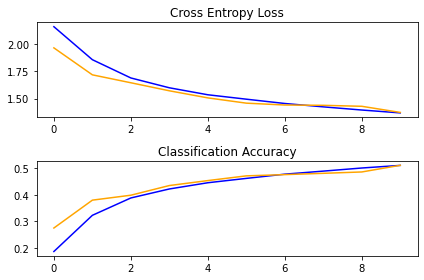

In [ ]:
summarize_results(history)

#Predict New Image

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [ ]:
# load and prepare the image
def load_image(filename):
  # load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
# load the image
img = load_image('frog.png')
# load model
model = load_model('final_model.h5')
# predict the class
result = model.predict_classes(img)
print(result[0])
 

3


In [ ]:
y = 2x
dy = 2

y = 2x + 3m + 4n
dy = 2 + 0 + 0